# Handwritten Digits Classifier






In [11]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Defining transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                              ])
# Downloading and loading the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [12]:
# Building a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [13]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor(1.00000e-02 *
       [[-0.1321, -0.1321, -0.1321,  ..., -0.1321, -0.1321, -0.1321],
        [-0.3873, -0.3873, -0.3873,  ..., -0.3873, -0.3873, -0.3873],
        [-0.3037, -0.3037, -0.3037,  ..., -0.3037, -0.3037, -0.3037],
        ...,
        [-0.7661, -0.7661, -0.7661,  ..., -0.7661, -0.7661, -0.7661],
        [-0.4088, -0.4088, -0.4088,  ..., -0.4088, -0.4088, -0.4088],
        [ 0.0417,  0.0417,  0.0417,  ...,  0.0417,  0.0417,  0.0417]])


## Training the network!


In [14]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [15]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clearing the gradients, 
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 2.4840e-02, -2.6884e-02, -2.0596e-02,  ...,  4.5712e-03,
         -2.1391e-02, -2.4442e-02],
        [ 2.9066e-02, -2.0584e-02,  3.6804e-03,  ...,  5.3506e-03,
          2.4278e-02,  3.0704e-02],
        [ 2.8318e-02, -1.2791e-03,  2.0885e-03,  ..., -2.3265e-02,
         -2.1992e-02, -1.1485e-02],
        ...,
        [ 4.6471e-03, -4.2645e-03, -3.2709e-02,  ...,  1.9057e-02,
          4.8022e-03,  8.9815e-03],
        [ 1.5660e-02,  2.8270e-02,  7.3760e-03,  ..., -3.2368e-02,
          2.2255e-02,  2.3497e-02],
        [-2.4798e-03,  4.6797e-03, -1.1077e-02,  ..., -2.9744e-02,
         -1.0008e-02, -1.1611e-03]])
Gradient - tensor(1.00000e-02 *
       [[-0.0895, -0.0895, -0.0895,  ..., -0.0895, -0.0895, -0.0895],
        [-0.1286, -0.1286, -0.1286,  ..., -0.1286, -0.1286, -0.1286],
        [-0.2071, -0.2071, -0.2071,  ..., -0.2071, -0.2071, -0.2071],
        ...,
        [-0.2959, -0.2959, -0.2959,  ..., -0.2959, -0.2959, -0.2959],
  

In [16]:
# update step 
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 2.4849e-02, -2.6875e-02, -2.0587e-02,  ...,  4.5802e-03,
         -2.1382e-02, -2.4433e-02],
        [ 2.9079e-02, -2.0571e-02,  3.6932e-03,  ...,  5.3634e-03,
          2.4291e-02,  3.0717e-02],
        [ 2.8339e-02, -1.2584e-03,  2.1092e-03,  ..., -2.3244e-02,
         -2.1971e-02, -1.1464e-02],
        ...,
        [ 4.6767e-03, -4.2349e-03, -3.2680e-02,  ...,  1.9086e-02,
          4.8318e-03,  9.0111e-03],
        [ 1.5665e-02,  2.8274e-02,  7.3803e-03,  ..., -3.2363e-02,
          2.2260e-02,  2.3501e-02],
        [-2.4749e-03,  4.6846e-03, -1.1073e-02,  ..., -2.9739e-02,
         -1.0003e-02, -1.1563e-03]])


### Training for real



In [17]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

# training for 5 epochs

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
       
        images = images.view(images.shape[0], -1)
    
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9351896689390577
Training loss: 0.9212276946697662
Training loss: 0.5351154313190405
Training loss: 0.42966633752337907
Training loss: 0.3855370813563688


Now checking out it's predictions.

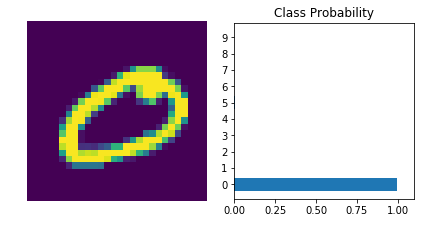

In [18]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)

with torch.no_grad():
    logps = model.forward(img)


ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)

Accurate Prediction
